#### Importing all the Required Libraries

In [43]:
### The time module to manage time-related tasks.
import time

### Selenium to control browsers 
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

###  Pandas for data manipulation and analysis.
import pandas as pd

### Matplotlib to create static, animated and interactive visualizations.
import matplotlib.pyplot as plt

### NumPy for scientific computing.
import numpy as np

### Data scraping 

In [ ]:
### Youtube video link (https://www.youtube.com/watch?v=LrTKeT8xBRg)


"""
Access the desired URL using the driver.get method. 

Scroll down and ensure all elements are visible with wait.until and EC.visibility_of_element_located.

Scrape comments by locating all #content-text elements on the current page, which contain the desired information.

"""
data=[]
with Chrome(executable_path=r'C:\Program Files\chromedriver.exe') as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=LrTKeT8xBRg")

    for item in range(200): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(10)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
        data.append(comment.text)

In [39]:
data__frame = pd.DataFrame(data, columns=['comment'])

In [ ]:
### To see all the text of the long comments
pd.options.display.max_colwidth = int(data__frame['comment'].str.len().max()) + 1

In [40]:
### The last 20 comments in the data frame
data__frame.tail(n=20)

,comment
1412,I hate pizza
1413,Yall
1414,what a waste
1415,Bdnd
1416,T
1417,T
1418,I hate pineapple pizza I like pepperoni pizza
1419,I didn’t got it i am unsubbing
1420,I just unsubscribe
1421,No


###### There are empty cells in the data

In [41]:
### Before making any changes to the data, I save a copy first. 
data__frame__copy= data__frame.copy()
data__frame__copy.head()

In [44]:
### First method to delete empty cells
data__frame.dropna(subset=['comment'], inplace=True)
data__frame.head(n=20)

In [59]:
### The seconde
df=data__frame__copy[data__frame__copy.comment != '']
df.head(n=20)

In [76]:
### Delate the header
df1= df.iloc[2:]

In [77]:
df1

,comment
4,"From one pizza fanatic to another, well done"
5,"You guys never cease to surprise me, congratulations on pulling this off!"
6,This is absolutely insane! Congratulations- and I hope you all got to eat a slice after all that work lol
7,I like how they celebrated with the entire pizza making crew. Amazing
8,"It’s rare to see a youtuber actually do what he promise,this guy deserves it for sure."
...,...
1420,I just unsubscribe
1421,No
1422,W
1423,I am not


### There are some duplicates data

In [92]:
### Delete all duplicate data, keeping the last
dff=df1.drop_duplicates(keep='last')

In [96]:
dff.tail(n=10)

,comment
1414,what a waste
1415,Bdnd
1417,T
1418,I hate pineapple pizza I like pepperoni pizza
1419,I didn’t got it i am unsubbing
1420,I just unsubscribe
1421,No
1422,W
1423,I am not
1424,I know this is a fun and money only for you . But why the hell you and your team inappropriate language in your video. My 8yrs old subscribed your channel and i was sitting with him watching this vidoe.i i told him to unsuscribe you ..


In [ ]:
### Save the data in csv file, so i can load it any time i want, and do the analysis. 
dff.to_csv('youtube_comment.csv',header=False,index=False, encoding='utf-8')

In [3]:
### Load the data
dff= pd.read_csv('youtube_comment.csv')

In [ ]:
### The instalation of vaderSentiment to do the sentiment analysis of the comments
pip install vaderSentiment

In [5]:
### Import vaderSentiment module (SentimentIntensityAnalyzer)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
dff = dff.rename(columns={'You guys never cease to surprise me, congratulations on pulling this off!': 'comment'})

### Sentiment Analysis

In [22]:
### This is the code for the sentiment analysis, and to count how many positive or negative or neutral sentiment we have

analyzer = SentimentIntensityAnalyzer()
neg=0
pos=0
net=0
for sentence in range(1287):
    vs = analyzer.polarity_scores(dff.iloc[sentence])
    if vs['compound'] >= 0.05 :
        pos=pos+1
 
    elif vs['compound'] <= - 0.05 :
        neg=neg+1
 
    else :
        net=net+1
print("Positive", pos)
print("neutral", net)
print("negative", neg)

Positive 634
neutral 508
negative 145


# Data visulization

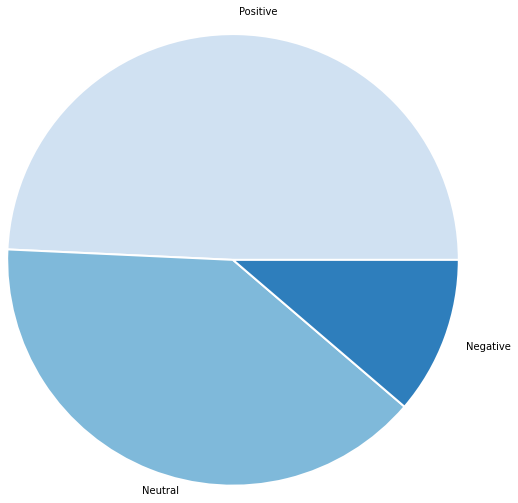

In [50]:
# make data
x = [pos, net, neg]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
labels = ['Positive', 'Neutral', 'Negative']

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=4, center=(4, 4),labels = labels,
       wedgeprops={"linewidth": 2, "edgecolor": "white"})

plt.show()

## Basically, after going through the comments and analyzing people's feelings, we can conclude that the video was well received by the majority.


## However, there are about 11% of negative comments, perhaps due to the inappropriate language used in the video for children, or the waste of food for some people.






### We can utilize the Word Cloud library  in Python,  to identify the most frequently occurring words. Additionally, we can determine the most positive and negative sentences.